
# Project 2: Investigate records of medical appointments in Brazil

This dataset collects information from approximately 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains the following columns
Patient ID<li>
Appointment ID<li>
Gender<li>
Day/Time when the appointment was scheduled<li>
Day/Time of scheduled appointment<li>
Age<li>
Neighborhood where the appointment takes place<li>
Whether the patient is enrolled in Bolsa Familia (true/false)<li>
Hypertension (true/false)<li>
Diabetes (true/false)<li>
Alcoholism (true/false)<li>
Handcap<li>
1 or more SMS sent to the patient (true/false)<li>
No Show (true/false)



. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.

First I will import the data in csv format in the data wrangling section below.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [516]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_style('darkgrid')

df = pd.read_csv('noshow_appt_2016.csv')

In [517]:
df.shape

(110527, 14)

Looks like there are 110,527 rows and 14 columns in the dataset.  Next I will use the info() function to take a more detailed look at each of the data columns.

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Looks like there are no blank or null data in any of the columns, as each columns shows 110527 non-null.  The data type looks to be ok so far.  Next I'll have a look at the first few rows.

In [519]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Cleaning

I noticed that the column names have a mix of upper and lower case letters.  Let's change them to all lowercase with underscore between words so that they're easier to read and is also good practice in Python.

In [520]:
# change all letters in column names to lowercase
df.columns = map(str.lower, df.columns)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [521]:
# rename columns to include underscore in between 2 words
df.rename(columns={"patientid" : "patient_id", "appointmentid" : "appointment_id" , "appointmentday" : "appointment_day","scheduledday" : "scheduled_day", "no-show" : "no_show"}, inplace = True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Next, I will check for duplicates in the appointment ID to make sure that we don't have duplicates of the same appointment in the dataset

In [522]:
# check for duplicates in appointment ID
df.appointment_id.duplicated().unique()

array([False])

There are no duplicate appointment IDs, as the unique value in the duplicated array doesn't show true.

From inspecting the data, I can see that the 3 columns patient_id, appointment_id, and neighbourhood will not be too useful in our analysis, so I drop these columns.  The reason behind this is that I'm not looking to analyze possible reasons for no shows based on either of Patient or Appointment ID.  Lastly, there are 81 different neighbourhoods where the appointments take place, and this is probably beyond the scope of my analysis since I don't have any geographical information as to where these neighbourhoods are located.

In [523]:
df.neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [524]:
df.neighbourhood.nunique()

81

In [525]:
# drop patient / appointment ID and Neighbourhood columns, which are not relevent
df.drop(['patient_id','appointment_id','neighbourhood'],axis=1, inplace = True) 
df.head()

,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [526]:
df.age.unique()


array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

Next, I will examine each of the remaining columns to check the unique values within each one, and see if it makes sense.  They all seem to be true/false or male/female type of information with the exception of handcap, in the its value can range from 0 to 4.  

In [527]:
df.scholarship.unique()

array([0, 1], dtype=int64)

In [528]:
df.hipertension.unique()

array([1, 0], dtype=int64)

In [529]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [530]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [531]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [532]:
df.sms_received.unique()

array([0, 1], dtype=int64)

In [533]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [534]:
df.gender.unique()

array(['F', 'M'], dtype=object)

Here I will change the Yes/No to 1/0 in the no_show column

In [535]:
df.no_show.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace = True)

Here I insert new columns sch_hr and appt_hr to represent the hour value of the scheduled_day and appointment_day columns by extracting the 2 digit hours from each of the 2 columns

In [536]:
df.insert(3,'sch_hr',df['scheduled_day'].str[11:13])
df.insert(4,'appt_hr',df['appointment_day'].str[11:13])
df.head()

,gender,scheduled_day,appointment_day,sch_hr,appt_hr,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,18,00,62,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,16,00,56,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,16,00,62,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,17,00,8,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,16,00,56,0,1,1,0,0,0,0


In [537]:
df.sch_hr.unique()

array(['18', '16', '17', '08', '15', '12', '14', '11', '10', '09', '07',
       '13', '19', '20', '06', '21'], dtype=object)

In [538]:
df.appt_hr.unique()

array(['00'], dtype=object)

From the 2 above cells, the appointment_day column only has hour of 00 on all entries.  For the purpose of this analysis, I will not use the time for appointment_day.  On the other hand, the scheduled_day contains entries from different hours throughout the day.  I will keep the hour value as it may come in handy later on.  Below I will remove the time value all together in scheduled_day and appointment_day column data by keeping only the first 10 characters from both columns using .str[:10]

In [539]:
df.scheduled_day = df.scheduled_day.str[:10]
df.appointment_day = df.appointment_day.str[:10]
df.drop(['appt_hr'],axis=1,inplace = True)
df.head()

,gender,scheduled_day,appointment_day,sch_hr,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,18,62,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,16,56,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,16,62,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,17,8,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,16,56,0,1,1,0,0,0,0


I will now conver the scheduled_day and appointment_day data type from a string to a date time format, so I can calculate the difference between the 2 dates later on.  Checking dtypes has confirmed the change to a datetime64 data type.

In [540]:
df.scheduled_day = pd.to_datetime(df.scheduled_day, format = '%Y-%m-%d' )
df.appointment_day = pd.to_datetime(df.appointment_day, format = '%Y-%m-%d')

In [541]:
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
sch_hr                     object
age                         int64
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                     int64
dtype: object

Now I insert a new column called day_delta, which is the difference in days between appointment_day and scheduled_day

In [542]:
# insert column showing difference between the appointment day and scheduled day
df.insert(5,'day_delta',(df.appointment_day - df.scheduled_day).dt.days)


In [543]:
df.head(10)

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,18,62,0,0,1,0,0,0,0,0
1,M,2016-04-29,2016-04-29,16,56,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,16,62,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,17,8,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,16,56,0,0,1,1,0,0,0,0
5,F,2016-04-27,2016-04-29,08,76,2,0,1,0,0,0,0,0
6,F,2016-04-27,2016-04-29,15,23,2,0,0,0,0,0,0,1
7,F,2016-04-27,2016-04-29,15,39,2,0,0,0,0,0,0,1
8,F,2016-04-29,2016-04-29,08,21,0,0,0,0,0,0,0,0
9,F,2016-04-27,2016-04-29,12,19,2,0,0,0,0,0,0,0


In [544]:
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
sch_hr                     object
age                         int64
day_delta                   int64
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                     int64
dtype: object

We shold also change the data types for sch_hr and appt_hr from string to int64

In [545]:
df.sch_hr = pd.to_numeric(df.sch_hr)
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
sch_hr                      int64
age                         int64
day_delta                   int64
scholarship                 int64
hipertension                int64
diabetes                    int64
alcoholism                  int64
handcap                     int64
sms_received                int64
no_show                     int64
dtype: object

In [546]:
df.query('day_delta < 0')

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
27033,M,2016-05-10,2016-05-09,10,38,-1,0,0,0,0,1,0,1
55226,F,2016-05-18,2016-05-17,14,19,-1,0,0,0,0,1,0,1
64175,F,2016-05-05,2016-05-04,13,22,-1,0,0,0,0,0,0,1
71533,F,2016-05-11,2016-05-05,13,81,-6,0,0,0,0,0,0,1
72362,M,2016-05-04,2016-05-03,6,7,-1,0,0,0,0,0,0,1


In [547]:
df.shape

(110527, 13)

Since there are 5 rows where the day that the appointment is scheduled is after the actual appopintment time, these rows are erroneous and I will drop them from the dataset

In [548]:
df.drop(df[df['day_delta'] < 0].index, inplace = True)


A quick check shows that these rows are now deleted

In [549]:
df.query('day_delta < 0')

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [550]:
df.shape

(110522, 13)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Does the patient's age play a factor on whether or not they show up for their appointments?

See below for some standard desciption on the age data.

In [551]:
df.age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Looks like there is an invalid age of -1.  Let's check how many of these instances we have.

In [552]:
df.query('age < 0')

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06,2016-06-06,8,-1,0,0,0,0,0,0,0,0


In [553]:
# drop row entries where age is less than 0
df.drop(df[df['age'] < 0].index, inplace = True)

In [554]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

Age 100 or greater look an outlier.  Although it's possible in real life to have ages greater than or equal to 100, I will consider these outliers and therefore drop these entries from the dataset.

In [555]:
df.query('age >= 100')

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,F,2016-05-03,2016-05-03,9,102,0,0,0,0,0,0,0,0
63912,F,2016-05-16,2016-05-19,9,115,3,0,0,0,0,1,0,1
63915,F,2016-05-16,2016-05-19,9,115,3,0,0,0,0,1,0,1
68127,F,2016-04-08,2016-05-16,14,115,38,0,0,0,0,1,0,1
76284,F,2016-05-30,2016-05-30,9,115,0,0,0,0,0,1,0,0
79270,M,2016-05-30,2016-05-31,16,100,1,0,0,0,0,1,0,0
79272,M,2016-05-30,2016-05-31,16,100,1,0,0,0,0,1,0,0
90372,F,2016-05-31,2016-06-02,10,102,2,0,0,0,0,0,0,0
92084,F,2016-05-06,2016-06-03,14,100,28,0,0,0,0,0,1,0
97666,F,2016-05-19,2016-06-03,7,115,15,0,1,0,0,0,1,0


In [556]:
# drop row entries where age is less than 0
df.drop(df[df['age'] >= 100].index, inplace = True)

In [557]:
df.age.describe()

count    110510.000000
mean         37.082409
std          23.100341
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

In [558]:
df.age.nunique()

100

The average age in all entries is 37.082.  The youngest patients is 0 (less than 1 yr old) and the oldest patient is 99.  The median is 37 which is right around what the mean is. Below is a histogram on age and by running df.age.unique() we can see that there are many different ages of patients.  Actually there are 101 unique ages.

### Scatter plots showing age vs various characteristics

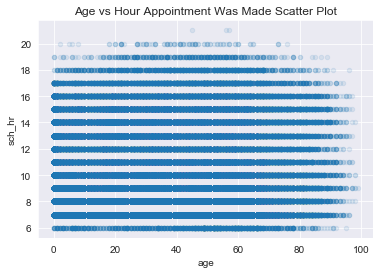

In [559]:
df.plot(x='age', y='sch_hr', title = 'Age vs Hour Appointment Was Made Scatter Plot', kind='scatter', alpha = 0.1);

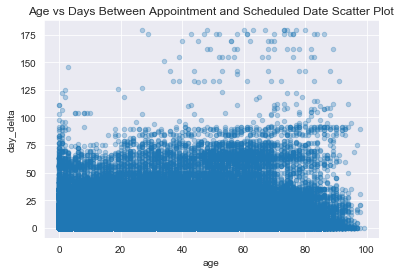

In [560]:
df.plot(x='age', y='day_delta',title = 'Age vs Days Between Appointment and Scheduled Date Scatter Plot', kind='scatter', alpha = 0.3);

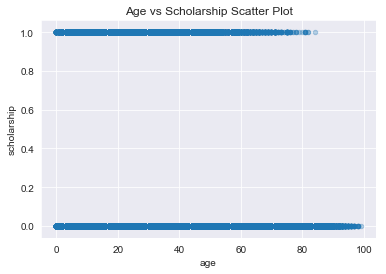

In [561]:
df.plot(x='age', y='scholarship', title = 'Age vs Scholarship Scatter Plot', kind='scatter', alpha = 0.3);

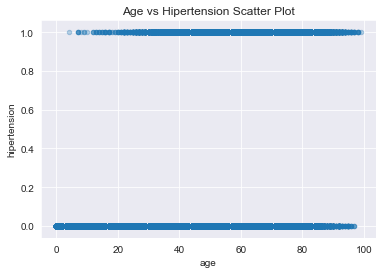

In [562]:
df.plot(x='age', y='hipertension', title = 'Age vs Hipertension Scatter Plot', kind='scatter', alpha = 0.3);

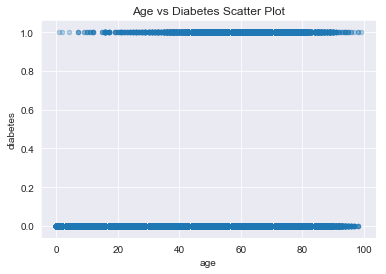

In [563]:
df.plot(x='age', y='diabetes', title = 'Age vs Diabetes Scatter Plot', kind='scatter', alpha = 0.3);

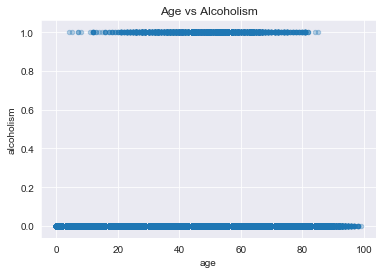

In [564]:
df.plot(x='age', y='alcoholism', title = 'Age vs Alcoholism', kind='scatter',alpha=0.3);

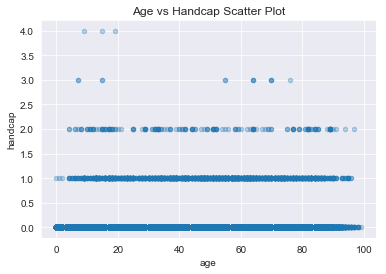

In [565]:
df.plot(x='age', y='handcap', title = 'Age vs Handcap Scatter Plot', kind='scatter', alpha = 0.3);

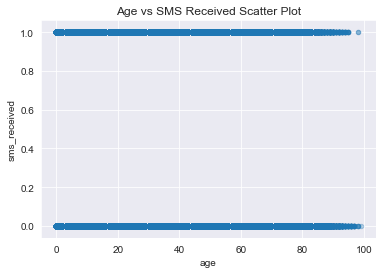

In [566]:
df.plot(x='age', y='sms_received', title = 'Age vs SMS Received Scatter Plot', kind='scatter', alpha = 0.3);

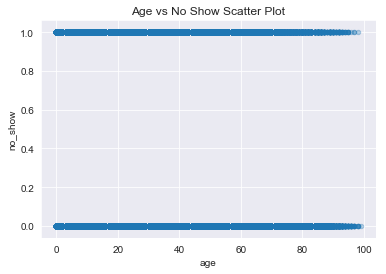

In [567]:
df.plot(x='age', y='no_show', title = 'Age vs No Show Scatter Plot', kind='scatter', alpha = 0.3);

Based on the above scatter plots, there is no much of any correlation between age and the various characteristics from the dataset.

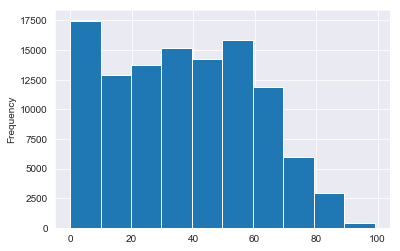

In [568]:
df.age.plot.hist();

In [569]:
df.age.unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99],
      dtype=int64)

In [570]:
df.age.nunique()

100

It's better to break the ages down into age groups for my analysis. I created 5 age groups for analysis, under 18, 18-34, 35-50, 50-65,and over 65

In [571]:
# create 5 age groups for analysis
# under 18, 18-34, 35-50, 50-65, over 65

# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 17, 34, 50, 65, 120] 

# Labels for each age group
bin_names = ['Under 18' ,'18 to 34' ,'35 to 50' ,'51 to 65', 'Over 65' ]

# Create age_group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

df.age_group.unique()

[51 to 65, Under 18, Over 65, 18 to 34, 35 to 50]
Categories (5, object): [Under 18 < 18 to 34 < 35 to 50 < 51 to 65 < Over 65]

Check that I have created the bins properly by making sure there are no nulls in the data.

In [572]:
df[df['age_group'].isnull()]

,gender,scheduled_day,appointment_day,sch_hr,age,day_delta,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group


Below I do a groupby to get the number of appointment no shows by age group

In [573]:
age_group_noshow = df.groupby(['age_group']).sum().no_show
age_group_noshow

age_group
Under 18    5996
18 to 34    5812
35 to 50    4780
51 to 65    3661
Over 65     2062
Name: no_show, dtype: int64

Below I calculate the total number of appointments by age group by counting all no_show values whether it's 0 or 1

In [574]:
age_group_total = df.groupby(['age_group']).count().no_show
age_group_total

age_group
Under 18    27378
18 to 34    24244
35 to 50    23477
51 to 65    22122
Over 65     13289
Name: no_show, dtype: int64

In [575]:
df.no_show.count()

110510

Calculate proportion of the number of no shows by total number of appointments for each age group

In [576]:
age_group_ns_prop = age_group_noshow / age_group_total
age_group_ns_prop

age_group
Under 18    0.219008
18 to 34    0.239729
35 to 50    0.203604
51 to 65    0.165491
Over 65     0.155166
Name: no_show, dtype: float64

Below I plot the number of no shows by age group

In [579]:
def plot_bar (values, xlabel, ylabel, title, labels= None, index=None):
    if np.any(index == True):           # if an index is passed into the function
        ind = index                     # ind represents the x locations
    else:
        ind = np.arange(len(values))    
        
        
    width = 0.35       # the width of the bars
    plt.figure(figsize=(20,10))
    
    # plot bars
    bars = plt.bar(ind, values, width, color='b', alpha=.7)

    # title and labels
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.title(title, fontsize=22)
    
    if np.all(index == None):          # if no index is passed into function
        locations = ind  # xtick locations    
        plt.xticks(locations, labels)
    
    plt.tick_params(axis="x", labelsize=14)
    plt.tick_params(axis="y", labelsize=14)
    
    return;

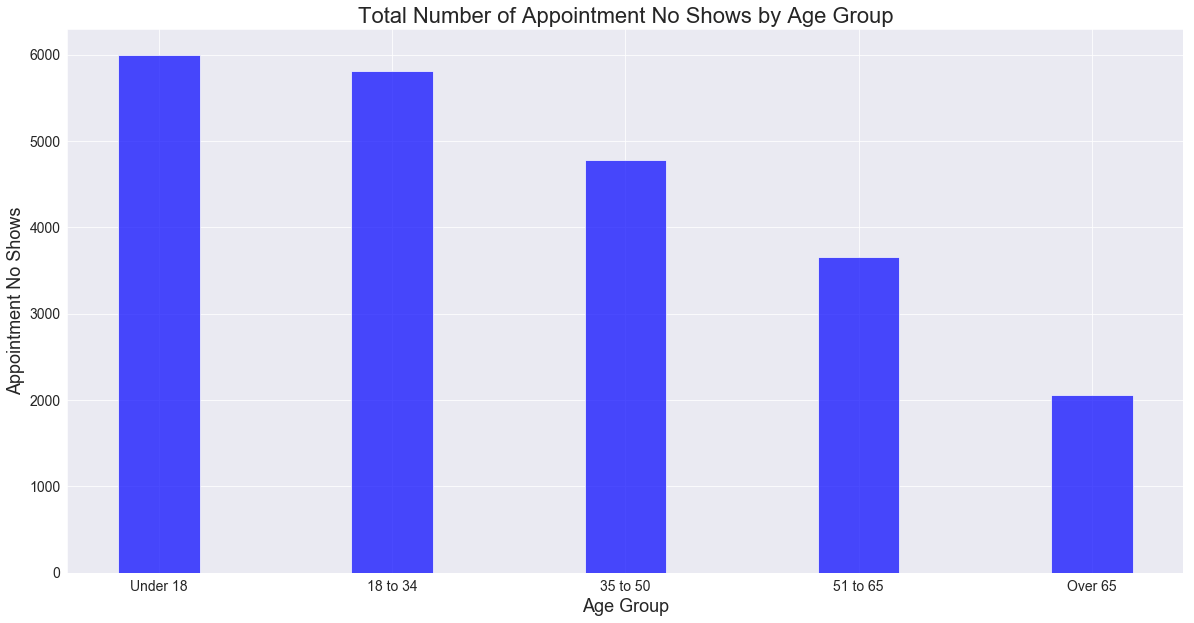

In [580]:
labels = ['Under 18', '18 to 34', '35 to 50', '51 to 65', 'Over 65']
plot_bar(age_group_noshow, 'Age Group', 'Appointment No Shows', 'Total Number of Appointment No Shows by Age Group', labels) 

And this is the plot of no show proportions by age group


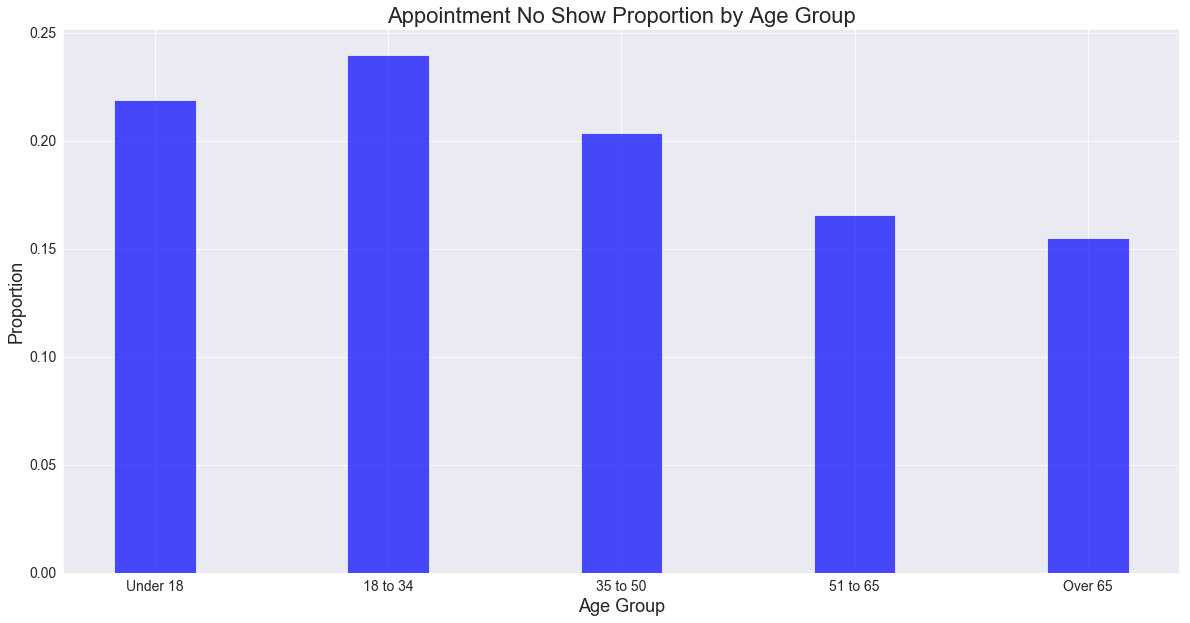

In [581]:
plot_bar(age_group_ns_prop, 'Age Group', 'Proportion','Appointment No Show Proportion by Age Group', labels) 

Older patients tend to not show up for their appointments less so than younger patients, as seen in how each age group did in terms of no show proportion, with the highest being in the 18 to 34 group at almost 24%, while those who are over 65 had the lowest no show proportion at 15.5%.  Those in the under 18 age group had a 22% no show rate.  In general the rate of no shows tend to decrease with age after 18-34.

### Research Question 2:  Does being on social welfare have an effect on appointment no shows?

In [582]:
welfare_ns = df.groupby(['scholarship']).sum().no_show
welfare_ns

scholarship
0    19733
1     2578
Name: no_show, dtype: int64

In [583]:
welfare_total = df.groupby(['scholarship']).count().no_show
welfare_total

scholarship
0    99649
1    10861
Name: no_show, dtype: int64

Below is a quick look at the total number of patients on the welfare program vs ones that are not.  Looks like the we have about 1 patient on welfare for every 10 not on welfare.

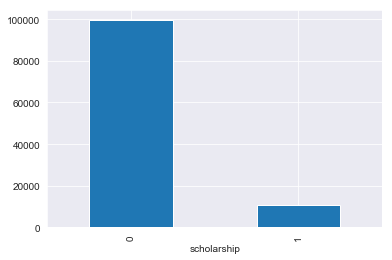

In [584]:
welfare_total.plot.bar();

In [585]:
welfare_prop = welfare_ns / welfare_total
welfare_prop

scholarship
0    0.198025
1    0.237363
Name: no_show, dtype: float64

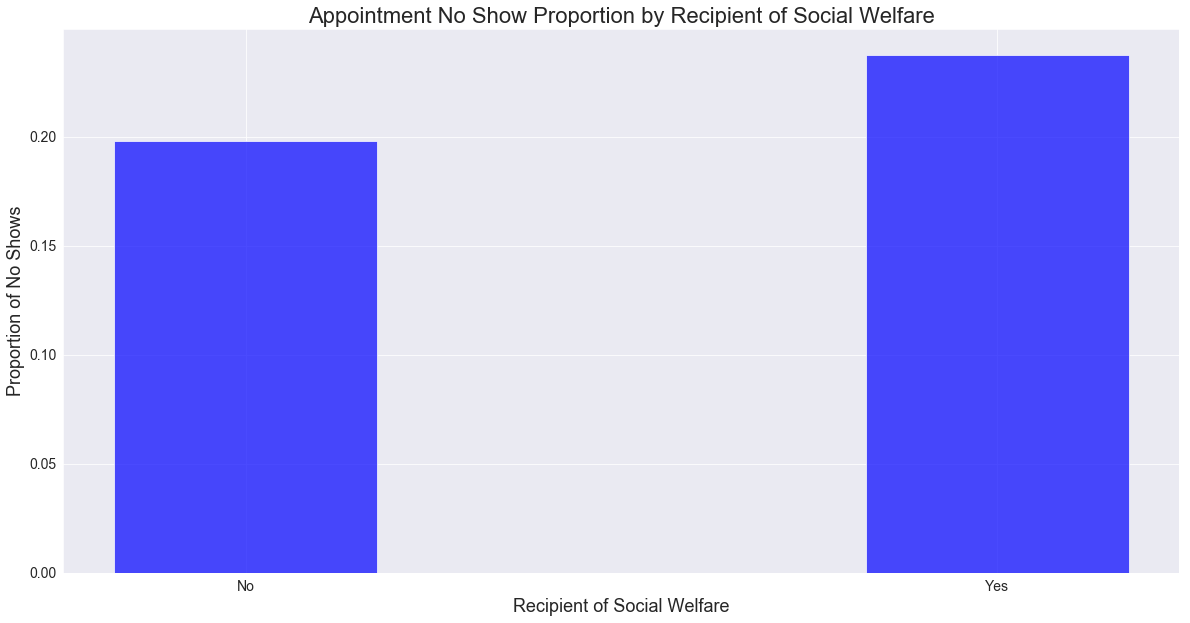

In [586]:
labels = ['No', 'Yes']
plot_bar(welfare_prop, 'Recipient of Social Welfare','Proportion of No Shows','Appointment No Show Proportion by Recipient of Social Welfare', labels)

Those who are on social welfare has a no show rate of 23.7% while those who are not social welfare had a no show rate of 19.8%.  This shows those who are on welfare is more likely to not show up for their appointments.

### Research Question 3:  Does gender have an effect on appointment no shows?

In [587]:
gender_ns = df.groupby(['gender']).sum().no_show
gender_ns

gender
F    14588
M     7723
Name: no_show, dtype: int64

In [588]:
gender_total = df.groupby(['gender']).count().no_show
gender_total


gender
F    71827
M    38683
Name: no_show, dtype: int64

Below is a quick look at the gender split among patients.  Interesting how there are almost twice as many female patients than male patients!

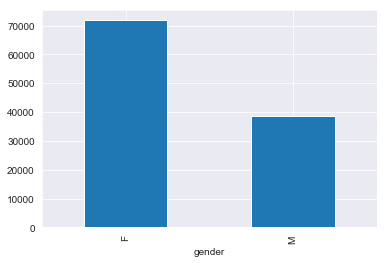

In [589]:
gender_total.plot.bar();

In [590]:
gender_prop = gender_ns / gender_total
gender_prop

gender
F    0.203099
M    0.199648
Name: no_show, dtype: float64

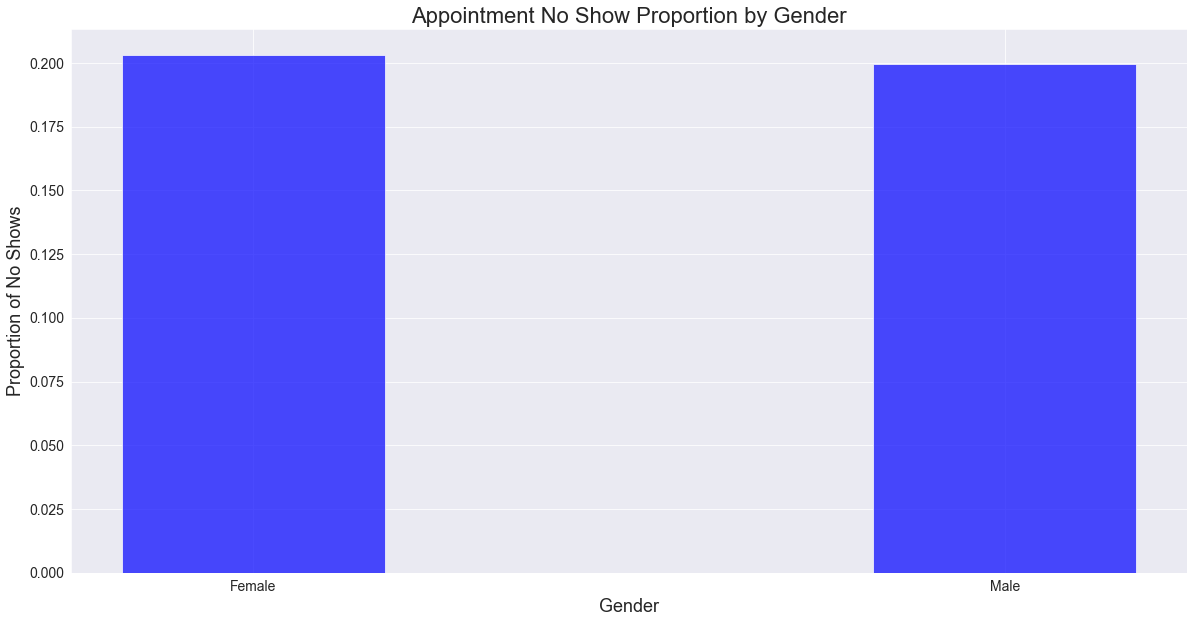

In [591]:
labels = ['Female', 'Male']
plot_bar(gender_prop, 'Gender', 'Proportion of No Shows', 'Appointment No Show Proportion by Gender', labels)

Male and female patients tend to have about the same no show rate, at 19.9% and 20.3% respectively. However what is interesting is tha there are almost twice as many female patients than male patients!

### Research Question 4: Does having received an SMS reminder improve appointment no show rates?

In [592]:
sms_received_ns = df.groupby(['sms_received']).sum().no_show
sms_received_ns

sms_received
0    12527
1     9784
Name: no_show, dtype: int64

In [593]:
sms_received_total = df.groupby(['sms_received']).count().no_show
sms_received_total

sms_received
0    75030
1    35480
Name: no_show, dtype: int64

In [594]:
sms_received_total[1] / (sms_received_total[0] + sms_received_total[1])

0.32105691792597957

Looking at the above number, about a third of patients have received at least one SMS reminder message for their appointment

Below is a quick look at the difference between who received a SMS remainder vs those who didn't.  

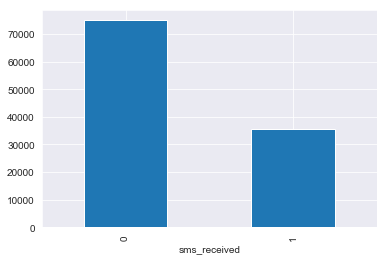

In [595]:
sms_received_total.plot.bar();

In [596]:
sms_prop = sms_received_ns / sms_received_total
sms_prop

sms_received
0    0.166960
1    0.275761
Name: no_show, dtype: float64

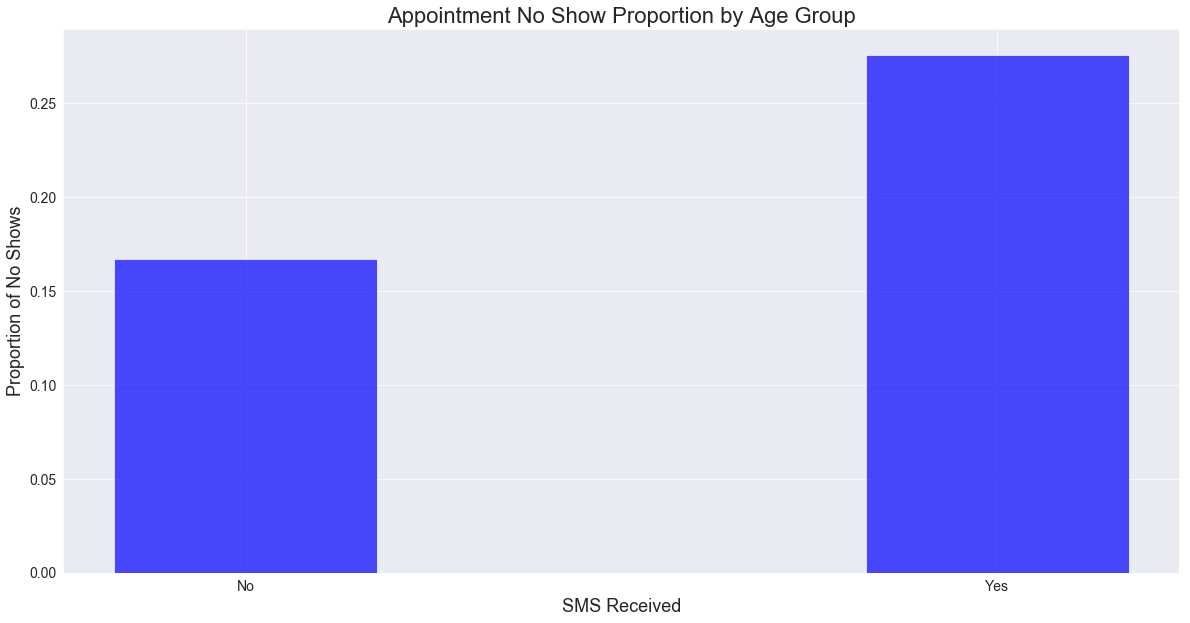

In [597]:
labels = ['No', 'Yes'] 
plot_bar(sms_prop,'SMS Received', 'Proportion of No Shows', 'Appointment No Show Proportion by Age Group', labels)

Contrary to what I thought, the no show rate is actually lower for patients that did not receive any SMS appointment reminders, at 16.7%, versus those who received SMS reminders, at 27.6%.   

### Research Question 5:  Does advance appointment make it more likely for people no not show up for their appointments?

Here I examine day_delta, which is the number of days between the appointment date and the day when the appointment was scheduled.

In [598]:
df.day_delta.describe()

count    110510.000000
mean         10.184418
std          15.255418
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_delta, dtype: float64

In [599]:
df.day_delta.nunique()

129

On average, appointments are scheduled about 10 days in advance. There are also same day appointments and ones scheduled as far out as 179 days in advance!  From the below chart it shows that the number of same day appointments overwhelmingly outnumbers the appointments made in advance.

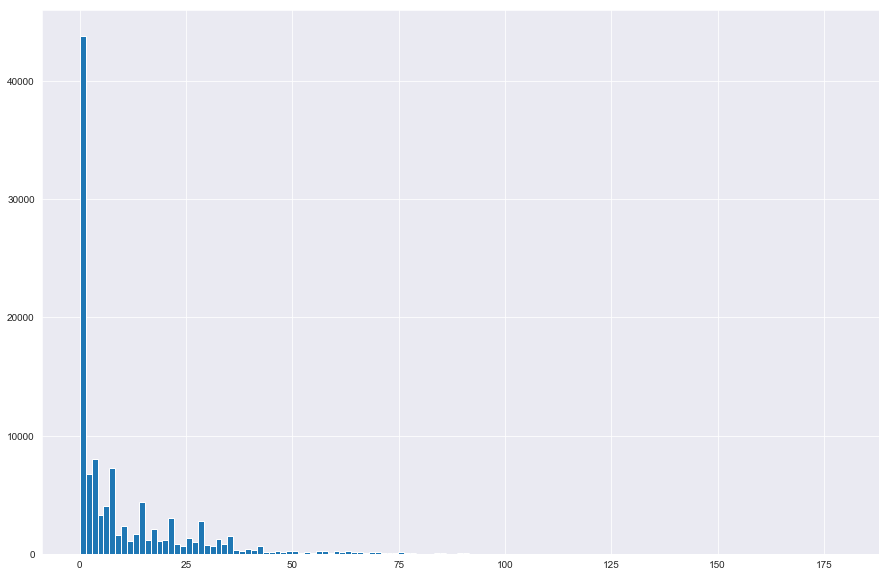

In [600]:
df.day_delta.hist(figsize=(15,10),bins=df.day_delta.nunique());

Below is number of no shows and total number of appointments grouped by number of days appointment was made in advance (include 0 days which means same day appointments)

In [601]:
delta_ns = df.groupby(['day_delta']).sum().no_show
delta_ns.head()

day_delta
0    1792
1    1113
2    1602
3     642
4    1231
Name: no_show, dtype: int64

In [602]:
delta_total = df.groupby(['day_delta']).count().no_show
delta_total.head()

day_delta
0    38560
1     5211
2     6724
3     2735
4     5290
Name: no_show, dtype: int64

In [603]:
delta_prop = delta_ns / delta_total

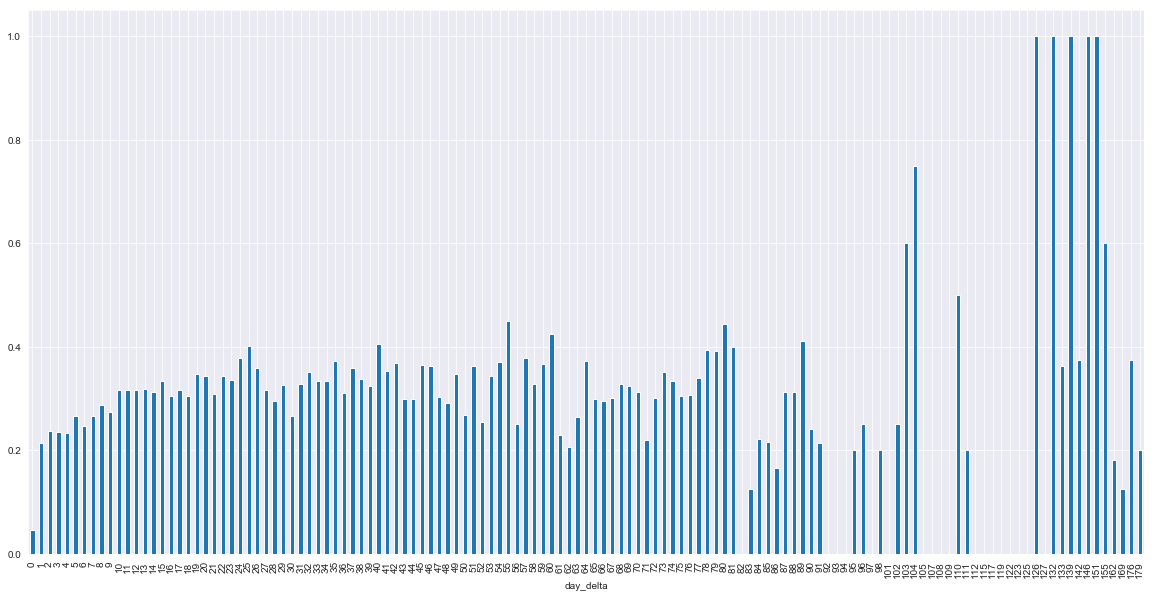

In [604]:
plt.figure(figsize=(20,10))
delta_prop.plot.bar();

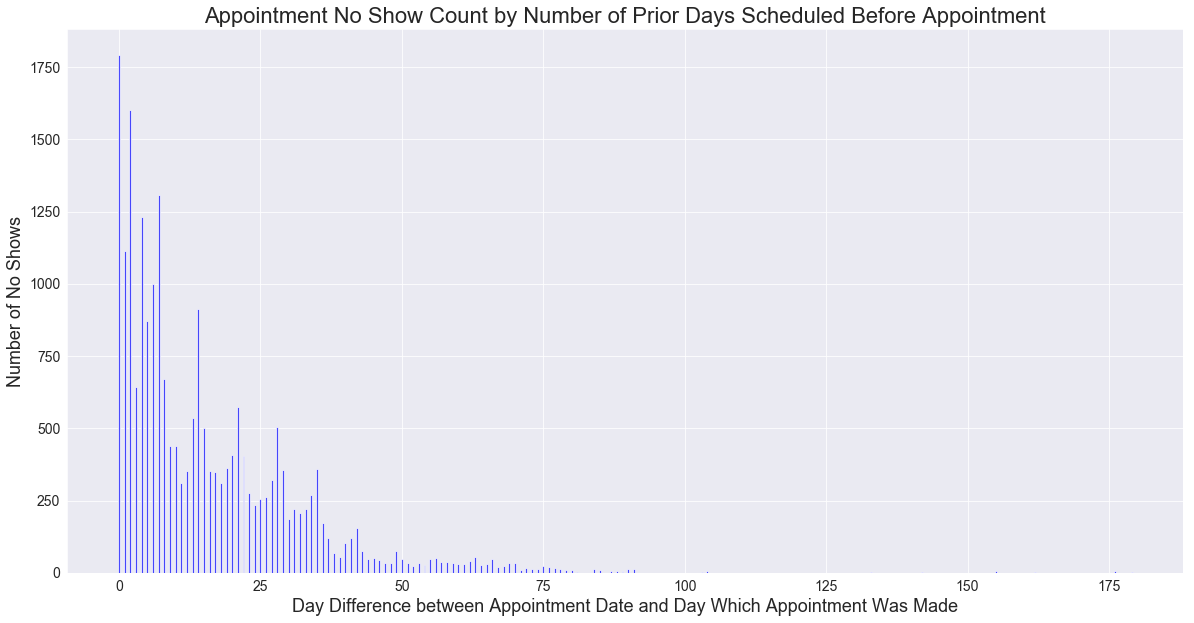

In [605]:
xlabel = 'Day Difference between Appointment Date and Day Which Appointment Was Made'
ylabel = 'Number of No Shows'
title = 'Appointment No Show Count by Number of Prior Days Scheduled Before Appointment'
plot_bar(delta_ns, xlabel, ylabel, title, index =  delta_ns.index)

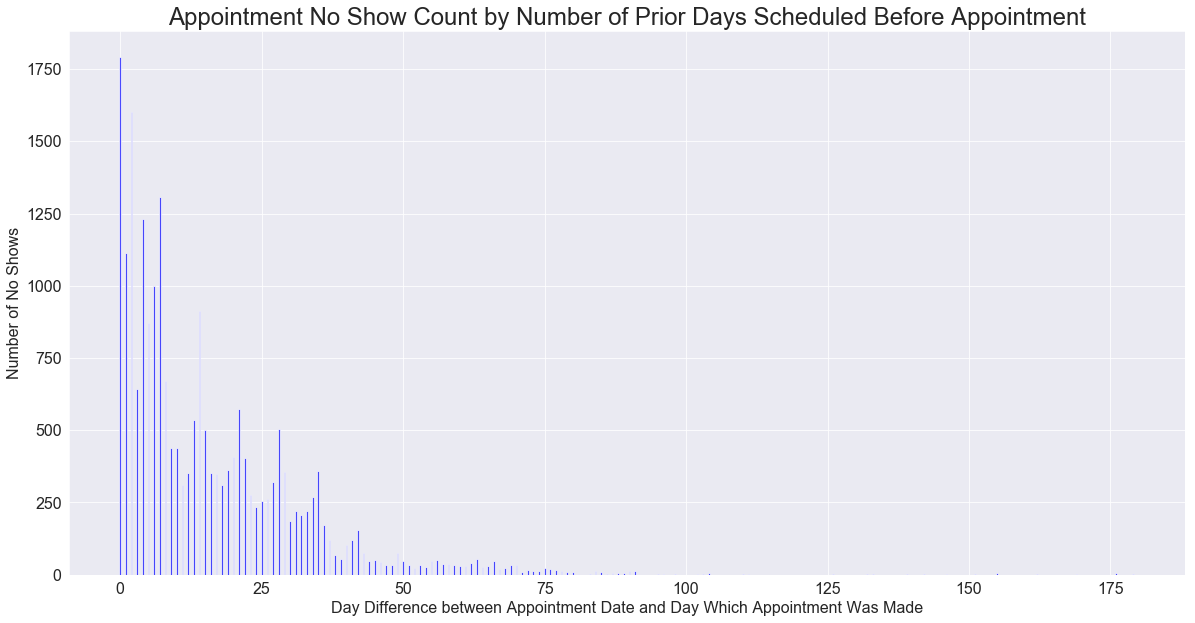

In [606]:
ind = delta_ns.index  # the x locations for the groups

width = 0.3       # the width of the bars
plt.figure(figsize=(20,10))

# plot bars
bars = plt.bar(ind, delta_ns, width, color='b', alpha=.7)

# title and labels
plt.ylabel('Number of No Shows',fontsize=16)
plt.xlabel('Day Difference between Appointment Date and Day Which Appointment Was Made',fontsize=16)
plt.title('Appointment No Show Count by Number of Prior Days Scheduled Before Appointment',fontsize=24)

plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)


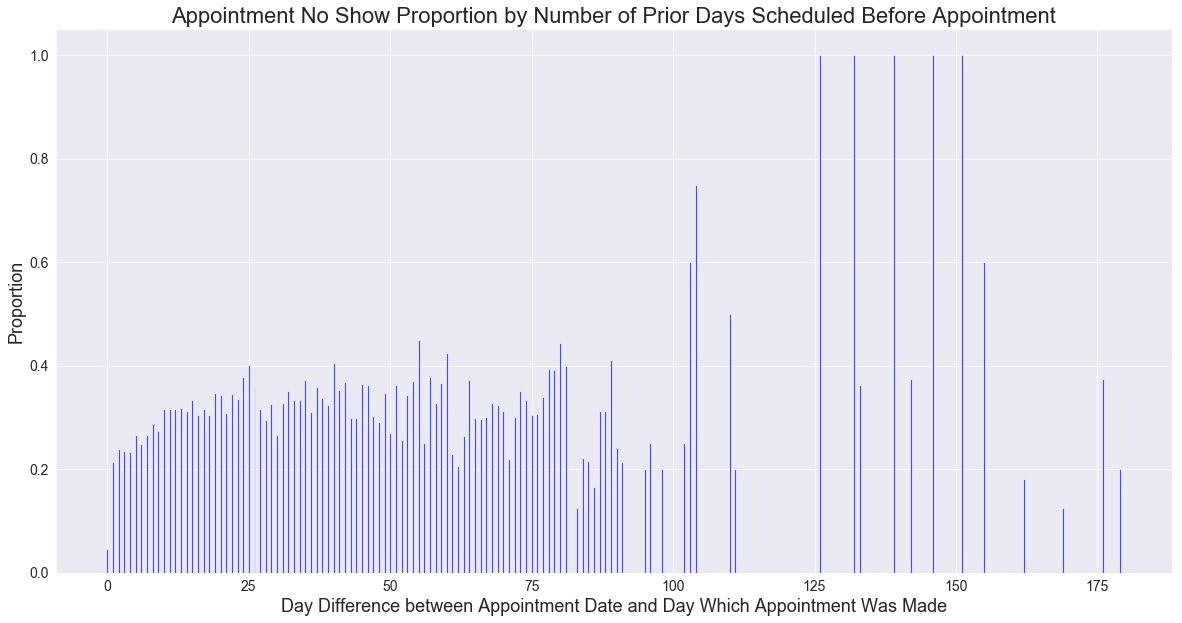

In [607]:
xlabel = 'Day Difference between Appointment Date and Day Which Appointment Was Made'
ylabel = 'Proportion'
title = 'Appointment No Show Proportion by Number of Prior Days Scheduled Before Appointment'
plot_bar(delta_prop, xlabel, ylabel, title, index = delta_ns.index)

Since there are so many day delta values, it's hard to visualize in a bar chart with so many lines.  I decided to split them up into groups.  I created a new column called delta_months and stored the category of each patient there.

In [608]:
# create 7 groups for analysis
# same day, 1 month, 2 months, 3 months, 4 months, 5 months, 6 months

# Bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 0, 29, 59, 89, 119, 149, 179] 

# Labels for each age group
bin_names = ['same day', '1 month', '2 months', '3 months', '4 months', '5 months', '6 months' ]

# Create delta_months column
df['delta_months'] = pd.cut(df['day_delta'], bin_edges, labels=bin_names)

df.delta_months.shape

(110510,)

Below I calculate the number of no shows, total number of patients, and the proportion of no shows grouped by delta months.  The resulting plot is much easier to read and interprete.

In [609]:
delta_months_ns = df.groupby(['delta_months']).sum().no_show
delta_months_ns

delta_months
same day     1792
1 month     16908
2 months     2984
3 months      557
4 months       41
5 months       11
6 months       18
Name: no_show, dtype: int64

In [610]:
delta_months_ns_total = df.groupby(['delta_months']).count().no_show
delta_months_ns_total

delta_months
same day    38560
1 month     60869
2 months     8913
3 months     1893
4 months      190
5 months       29
6 months       56
Name: no_show, dtype: int64

In [611]:
delta_months_ns_prop = delta_months_ns / delta_months_ns_total
delta_months_ns_prop

delta_months
same day    0.046473
1 month     0.277777
2 months    0.334792
3 months    0.294242
4 months    0.215789
5 months    0.379310
6 months    0.321429
Name: no_show, dtype: float64

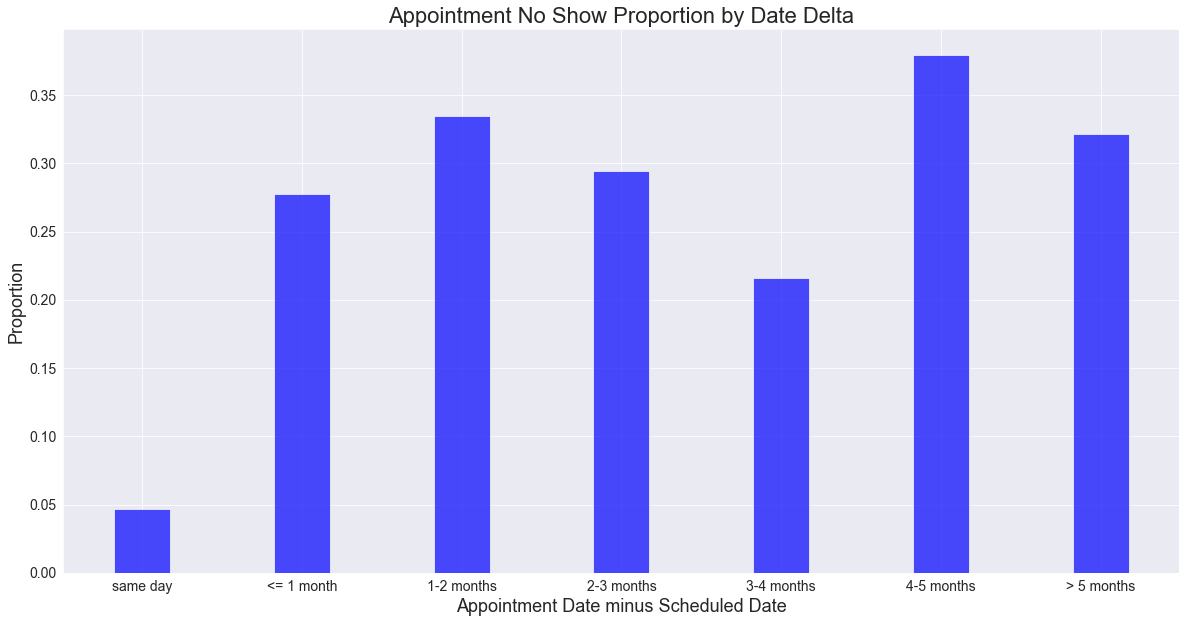

In [612]:
labels = ['same day', '<= 1 month', '1-2 months', '2-3 months', '3-4 months', '4-5 months', '> 5 months' ]
xlabel = 'Appointment Date minus Scheduled Date'
ylabel = 'Proportion'
title = 'Appointment No Show Proportion by Date Delta'
plot_bar(delta_months_ns_prop, xlabel, ylabel, title, labels)

The no show rate is the lowest for patients that made a same day appointment (less than 5%) vs those who made an appointment in advance.  Those who made the appointment betweeen 3 and 4 months in advance had the lowest no show rate in the group while those who made an appointment 4 to 5 months in advance had a no show rate of 38%.

<a id='conclusions'></a>
## Conclusion

#### Here are a few conclusions from my study of the medical appointment dataset.

1. Older patients tend to not show up for their appointments less than younger patients.<br><br>
2. Patients who are enrolled on Bolsa Familia tend to have sligthly higher no-show rates than those who are not.<br><br>
3. Male and female patients across the board have roughly the same no-show rates.<br><br>
4. Patients who received SMS reminders had a higher no-show rate than those who did not receive SMS reminders.<br><br>
5. Patients who have their appointments scheduled on the same day of their appointment had a much lower no-show rate than those who have their appointments scheduled in advance.


#### Some limitations of my analysis include

1. No statistical tests or analysis were performed.<br><br>
2. We don't know the cause or reason behind why patients did not show up for their apppointments. Some may have no showed up because they simply were not sick anymore!<br><br>
3. There is no information whether those who did not show up for their appointments actually cancelled their appointments, or did they simply just not show up.<br><br>
4. There's no clear explanation as to what "handcap" and its various levels mean (0, 1, 2, 3, 4) since it's not a binary yes or no.
